In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from plotnine import *

In [2]:
df = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/Hitters.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df['Salary'] = df['Salary'].fillna(np.mean(df['Salary']))
#df.dropna(subset=['Salary'],inplace=True)

In [6]:
X = df.drop('Salary',axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=42)

**Created functions make the code more efficient and readable**

In [ ]:
# function for creating the Pipeline. 

numVar = make_column_selector(dtype_include=['float64', 'int64'])
categoryVar = ['League','Division','NewLeague']


def modelPipeline(modelName):
    transformers = [('Standardize', StandardScaler(),numVar)]
    if categoryVar:
        transformers.append(('Encoding', OneHotEncoder(), categoryVar))
    ct = ColumnTransformer(
    transformers= transformers,
    remainder= 'passthrough'
)
    model = Pipeline(
    steps=[
        ('preprocessing',ct),
        ('Model',modelName)
    ]
)
    return model

In [ ]:
# function for finding the important coeficiants.

def impCoef(model):
    modelName = model.named_steps['Model']
    coef = modelName.coef_

    featureNames = model.named_steps['preprocessing'].get_feature_names_out()
    # cleanedFeatures = [name.replace('Standardize__','') for name in featureNames]
    # cleanedFeatures = [name.replace('Encoding__','') for name in cleanedFeatures]

    coefDict = dict(zip(featureNames, coef))
    sortedCoef = sorted(coefDict.items(), key=lambda x: abs(x[1]), reverse=True)
    print("Important feature in Decending order are:")
    for feature, coef in sortedCoef:
        print(f"{feature}: {coef}")
    

In [67]:
# function for finding the MSE value

def crossVal(piplineName,X=X,y=y):
    cv = cross_val_score(piplineName, X,y, scoring='neg_mean_squared_error', cv = 10)
    score = -np.mean(cv)
    return print(f"Cross Val Score is {score}")

In [ ]:
# function for tunning the model

def tunning(pipelineName, X=X,y=y):
    paramGrid = {
        "Model__alpha" : [0.001, 0.01, 0.1, 1, 10, 100]
    }
    gridSearch = GridSearchCV(pipelineName,paramGrid, cv =10,scoring='neg_mean_squared_error')
    gridSearch.fit(X,y)
    print(f"Best Alpha value: ")
    return gridSearch.best_params_['Model__alpha']

In [11]:
def elasTunning(pipelineName, X=X,y=y):
    paramGrid = {
        "Model__alpha" : [0.001, 0.01, 0.1, 1, 10, 100],
        "Model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1]
    }
    gridSearch = GridSearchCV(pipelineName,paramGrid, cv =10,scoring='neg_mean_squared_error')
    gridSearch.fit(X,y)
    print(f"Best alpha value: {gridSearch.best_params_['Model__alpha']}")
    print(f"Best l1_ratio value: {gridSearch.best_params_['Model__l1_ratio']}")
    return gridSearch.best_params_['Model__alpha'], gridSearch.best_params_['Model__l1_ratio']


# Part I: Different Model Specs

## A. Regression without regularization

**1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary linear regression.**

In [12]:
modelPipeline(LinearRegression())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16fc6f690>),
                                                 ('Encoding', OneHotEncoder(),
                                                  ['League', 'Division',
                                                   'NewLeague'])])),
                ('Model', LinearRegression())])

**2. Fit this pipeline to the full dataset, and interpret a few of the most important coefficients.**

In [13]:
p1Model = modelPipeline(LinearRegression())
p1Model.fit(X,y)
impCoef(p1Model)

Important feature in Decending order are:
Standardize__CRuns: 429.1188810776013
Standardize__AtBat: -310.83369946609247
Standardize__CAtBat: -309.72345130259697
Standardize__Hits: 286.92205059712836
Standardize__CRBI: 210.89251515025686
Standardize__CWalks: -177.75371266019346
Standardize__Walks: 113.77095895125687
Standardize__CHits: 92.05845513514916
Standardize__PutOuts: 65.70063996330705
Encoding__Division_W: -55.503794546767224
Encoding__Division_E: 55.503794546766386
Standardize__Years: -53.16050459794242
Standardize__Assists: 52.000840151978544
Standardize__CHmRun: -40.52728869202676
Standardize__HmRun: 39.17658075276058
Standardize__Errors: -28.301165282749384
Standardize__Runs: -24.297883331429137
Standardize__RBI: -12.328385102598588
Encoding__League_N: 10.140949349732237
Encoding__League_A: -10.140949349732166
Encoding__NewLeague_N: -0.8805091431620714
Encoding__NewLeague_A: 0.8805091431614019


**3. Use cross-validation to estimate the MSE you would expect if you used this pipeline to predict 1989 salaries.**

In [14]:
crossVal(p1Model)

Cross Val Score is 108571.01508847889


## B. Ridge regression

**1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary ridge regression.**

In [15]:
modelPipeline(Ridge())

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16fc6f690>),
                                                 ('Encoding', OneHotEncoder(),
                                                  ['League', 'Division',
                                                   'NewLeague'])])),
                ('Model', Ridge())])

**2. Use cross-validation to tune the alpha hyperparameter.**

In [16]:
p2Model = modelPipeline(Ridge())
tunning(p2Model)

Best Alpha value: 


1

**3. Fit the pipeline with your chosen to the full dataset, and interpret a few of the most important coefficients.**

In [17]:
p2Model = modelPipeline(Ridge(alpha=1)).fit(X,y)
impCoef(p2Model)

Important feature in Decending order are:
Standardize__CRuns: 308.50231152724336
Standardize__AtBat: -291.9994968466023
Standardize__Hits: 254.47086631362686
Standardize__CAtBat: -192.81272887850105
Standardize__CWalks: -155.85690696041013
Standardize__CRBI: 132.05539160669926
Standardize__CHits: 128.64089057562074
Standardize__Walks: 106.08306872209265
Standardize__Years: -67.88901147221856
Standardize__PutOuts: 65.5773339451686
Encoding__Division_E: 56.88128709825001
Encoding__Division_W: -56.88128709824844
Standardize__Assists: 46.972985482059144
Standardize__Errors: -29.256099871023288
Standardize__HmRun: 24.40615494183578
Encoding__League_A: -10.762649005652616
Encoding__League_N: 10.76264900565046
Standardize__CHmRun: 3.158589852325381
Encoding__NewLeague_N: -2.2977751207442902
Encoding__NewLeague_A: 2.2977751207425037
Standardize__Runs: -1.7862300282189254
Standardize__RBI: 0.13758413009539608


**4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.**

In [18]:
crossVal(p2Model)

Cross Val Score is 105919.61042660619


## C. Lasso Regression

**1. Create a pipeline that includes all the columns as predictors for Salary, and performs ordinary Lasso regression.**

In [19]:
modelPipeline(Lasso(max_iter=10000))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16fc6f690>),
                                                 ('Encoding', OneHotEncoder(),
                                                  ['League', 'Division',
                                                   'NewLeague'])])),
                ('Model', Lasso(max_iter=10000))])

**2. Use cross-validation to tune the labda hyperparameter.**

In [69]:
p3Model = modelPipeline(Lasso(max_iter=10000))
tunning(p3Model)

Best Alpha value: 


1

**3. Fit the pipeline with your chosen lambda to the full dataset, and interpret a few of the most important coefficients.**

In [21]:
p3Model = modelPipeline(Lasso(max_iter=10000,alpha=1))
p3Model.fit(X,y)
impCoef(p3Model)

Important feature in Decending order are:
Standardize__CRuns: 322.9205676316984
Standardize__AtBat: -301.96486159476433
Standardize__Hits: 268.25735483304743
Standardize__CWalks: -159.30342825470214
Standardize__CRBI: 129.39814764366895
Encoding__Division_E: 111.33648718333603
Standardize__Walks: 103.90579801095905
Standardize__Years: -71.47940023305131
Standardize__CAtBat: -66.68391478804166
Standardize__PutOuts: 65.93556662186202
Standardize__Assists: 39.404671842879836
Standardize__Errors: -23.92882775035471
Standardize__HmRun: 19.155250820144946
Encoding__League_A: -13.703030295745721
Standardize__RBI: 1.6394045853705523
Encoding__Division_W: -1.2353592278968625e-11
Encoding__League_N: 8.538113526847898e-15
Standardize__Runs: -0.0
Standardize__CHits: 0.0
Standardize__CHmRun: 0.0
Encoding__NewLeague_A: -0.0
Encoding__NewLeague_N: 0.0


**4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.**

In [22]:
crossVal(p3Model)

Cross Val Score is 105859.2813132795


## D. Elastic Net

**1. Create a pipeline that includes all the columns as predictors for Salary, and performs Elastic Net.**

In [23]:
modelPipeline(ElasticNet(max_iter=10000))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standardize',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16fc6f690>),
                                                 ('Encoding', OneHotEncoder(),
                                                  ['League', 'Division',
                                                   'NewLeague'])])),
                ('Model', ElasticNet(max_iter=10000))])

**2. Use cross-validation to tune the lambda and alpha hyperparameters.**

In [24]:
p4Model = modelPipeline(ElasticNet(max_iter=10000))
elasTunning(p4Model)

Best alpha value: 0.1
Best l1_ratio value: 0.9


(0.1, 0.9)

**3. Fit the pipeline with your chosen hyperparameters to the full dataset, and interpret a few of the most important coefficients.**

In [25]:
p4Model = modelPipeline(ElasticNet(max_iter=10000, alpha= 0.1, l1_ratio= 0.9))
p4Model.fit(X,y)
impCoef(p4Model)

Important feature in Decending order are:
Standardize__AtBat: -244.65445573479835
Standardize__CRuns: 211.43322304371316
Standardize__Hits: 203.4570569834144
Standardize__CWalks: -126.45673823379403
Standardize__CHits: 120.90978783333797
Standardize__CRBI: 94.32917562283104
Standardize__Walks: 93.32351680102745
Standardize__CAtBat: -86.1192520959689
Standardize__Years: -76.33572184673228
Standardize__PutOuts: 64.92186164002365
Encoding__Division_W: -57.945864348591286
Encoding__Division_E: 57.94493131251927
Standardize__Assists: 39.42505728928167
Standardize__Errors: -29.675134673207662
Standardize__CHmRun: 20.818539035211863
Standardize__Runs: 18.123485356045542
Standardize__HmRun: 11.383189426214056
Standardize__RBI: 9.766859623828207
Encoding__League_N: 9.71656318993199
Encoding__League_A: -9.716171655173541
Encoding__NewLeague_N: -1.5041254172561962
Encoding__NewLeague_A: 1.502391366457782


**4. Report the MSE you would expect if you used this pipeline to predict 1989 salaries.**

In [26]:
crossVal(p4Model)

Cross Val Score is 105645.94583040374


# Part II. Variable Selection

Based on the above results, decide on:

- Which numeric variable is most important.<br>
  **CRuns**
- Which five numeric variables are most important<br>
  **CRuns, AtBat, Hits, CWalks, CHits**

- Which categorical variable is most important.<br>
  **Divsion**

**1. Using only the one best numeric variable.**

In [70]:
XOne = df[['CRuns']]
yOne = df['Salary']

numVar = ['CRuns']
categoryVar = []


In [ ]:
# Linear Regression

oneVarModel = modelPipeline(LinearRegression())
oneVarModel.fit(XOne,yOne)
crossVal(oneVarModel,XOne,yOne)

Cross Val Score is 126832.58524490839


In [29]:
# Ridge Regression
oneVarModel = modelPipeline(Ridge()).fit(XOne,yOne)
parameter =tunning(oneVarModel,XOne,yOne)
print(parameter)
oneVarModel = modelPipeline(Ridge(alpha=parameter)).fit(XOne,yOne)
crossVal(oneVarModel,XOne,yOne)


Best Alpha value: 
10
Cross Val Score is 126784.03448863121


In [30]:
# Lasso Regression
oneVarModel = modelPipeline(Lasso()).fit(XOne,yOne)
parameter =tunning(oneVarModel,XOne,yOne)
print(parameter)
oneVarModel = modelPipeline(Lasso(alpha=parameter)).fit(XOne,yOne)
crossVal(oneVarModel,XOne,yOne)

Best Alpha value: 
1
Cross Val Score is 126827.78898222095


In [31]:
# ElasticNet
oneVarModel = modelPipeline(ElasticNet(max_iter=10000)).fit(XOne,yOne)
parameterAlpha, parameterL1 =elasTunning(oneVarModel,XOne,yOne)
oneVarModel = modelPipeline(ElasticNet(max_iter=10000,alpha=parameterAlpha, l1_ratio=parameterL1)).fit(XOne,yOne)
crossVal(oneVarModel,XOne,yOne)

Best alpha value: 0.1
Best l1_ratio value: 0.7
Cross Val Score is 126785.3838966644


**2. Using only the five best variables.**

In [32]:
XFive = df[['CRuns', 'AtBat', 'Hits', 'CWalks', 'CHits']]
yFive = df['Salary']

#defing Numerical and Categorical Variable for the columnTransformer
numVar = ['CRuns', 'AtBat', 'Hits', 'CWalks', 'CHits']
categoryVar = []

# Linear Regression
fiveVarModel = modelPipeline(LinearRegression())
oneVarModel.fit(XFive,yFive)
crossVal(oneVarModel,XFive,yFive)

Cross Val Score is 115316.89849598255


In [33]:
# Ridge Regression
fiveVarModel = modelPipeline(Ridge()).fit(XFive,yFive)
parameter =tunning(oneVarModel,XFive,yOne)
print(parameter)
fiveVarModel = modelPipeline(Ridge(alpha=parameter)).fit(XFive,yFive)
crossVal(fiveVarModel,XFive,yFive)

Best Alpha value: 
0.01
Cross Val Score is 114685.4197753759


In [34]:
# Lasso Regression
fiveVarModel = modelPipeline(Lasso()).fit(XFive,yFive)
parameter =tunning(oneVarModel,XFive,yOne)
print(parameter)
fiveVarModel = modelPipeline(Lasso(alpha=parameter)).fit(XFive,yFive)
crossVal(fiveVarModel,XFive,yFive)

Best Alpha value: 
0.01
Cross Val Score is 114686.6027536951


In [35]:
# ElasticNet
fiveVarModel = modelPipeline(ElasticNet(max_iter=10000)).fit(XFive,yFive)
parameterAlpha, parameterL1 =elasTunning(fiveVarModel,XFive,yFive)
fiveVarModel = modelPipeline(ElasticNet(max_iter=10000,alpha=parameterAlpha, l1_ratio=parameterL1)).fit(XFive,yFive)
crossVal(fiveVarModel,XFive,yFive)

Best alpha value: 0.01
Best l1_ratio value: 0.7
Cross Val Score is 114620.3463386457


**3. Using the five best numeric variables and their interactions with the one best categorical variable.**

In [56]:
XInter = df[['CRuns', 'AtBat', 'Hits', 'CWalks', 'CHits','Division']]
yInter = df['Salary']

#defing Numerical and Categorical Variable for the columnTransformer
numVar = ['CRuns', 'AtBat', 'Hits', 'CWalks', 'CHits']
categoryVar = ['Division']

In [57]:
def polyModelPipeline(modelName):
    # Create interaction terms between the numeric variables and the categorical variable
    interaction_transformer = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numVar),  # Standardizing numeric variables    
            ('cat', OneHotEncoder(drop='first'), categoryVar),  # Encoding the categorical variable
            ('interaction', PolynomialFeatures(degree=2, interaction_only=True), numVar)  # Interaction terms
        ],
        remainder='passthrough'
    )
    
    model = Pipeline(
        steps=[
            ('preprocessing', interaction_transformer),
            ('Model', modelName)
        ]
    )
    return model

In [58]:
# Linear Regression
interModel = polyModelPipeline(LinearRegression())
interModel.fit(XInter,yInter)
crossVal(interModel,XInter,yInter)

Cross Val Score is 111831.1347252919


In [ ]:
# for removing the warning. The polyModel pipeline creates alot of variable after encoding which causes alot of warning message. Find a way to remove those by using PCA but didn't try for this Lab.

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings related to numerical issues in sklearn's Ridge model
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", message=".*Ill-conditioned matrix.*")

In [60]:
# Ridge Regression
interModel = polyModelPipeline(Ridge()).fit(XInter,yInter)
parameter =tunning(interModel,XInter,yInter)
print(parameter)
interModel = polyModelPipeline(Ridge(alpha=parameter)).fit(XInter,yInter)
crossVal(interModel,XInter,yInter)

Best Alpha value: 
10
Cross Val Score is 111795.38550751269


In [61]:
# Lasso Regression
interModel = polyModelPipeline(Lasso(max_iter=10000)).fit(XInter,yInter)
parameter =tunning(interModel,XInter,yInter)
print(parameter)
interModel = polyModelPipeline(Lasso(alpha=parameter)).fit(XInter,yInter)
crossVal(interModel,XInter,yInter)

Best Alpha value: 
0.001
Cross Val Score is 110165.87308820807


In [62]:
# ElasticNet
interModel = polyModelPipeline(ElasticNet(max_iter=10000)).fit(XInter,yInter)
parameterAlpha, parameterL1 =elasTunning(interModel,XInter,yInter)
interModel = polyModelPipeline(ElasticNet(max_iter=100000,alpha=parameterAlpha, l1_ratio=parameterL1)).fit(XInter,yInter)
crossVal(interModel,XInter,yInter)

Best alpha value: 100
Best l1_ratio value: 0.1
Cross Val Score is 110703.4096821982


# Part III. Discussion

## A. Ridge

**Compare your Ridge models with your ordinary regression models. How did your coefficients compare? Why does this make sense?**<br>
The Ridge Coefficients are smaller compared to the ordinary regression modle. It makes sense because Ridge puts penalty, to make modal less complex and helping with the multicollinearity.

## B. LASSO

**Compare your LASSO model in I with your three LASSO models in II. Did you get the same Lambda 
 results? Why does this make sense? Did you get the same MSEs? Why does this make sense?**<br>
 
The lambda value are differnt as the number of independent variable changes the penalty changes according to the model. The MSEs are also differnt because used differnt variable which are giving differnt resuld. Lasso algorithm selects the important features only and assign 0 to the non important variables because of this when we use differnt variable we are getting different results.


## C. Elastic Net

**Compare your MSEs for the Elastic Net models with those for the Ridge and LASSO models. Why does it make sense that Elastic Net always “wins”?**<br>

Elastic Net was always better that the Ridge and Lasso models. This makes sense as Elastic Net help getting the best of both worlds from Ridge and Lasso. As this models do the feature selection and the coeficiant shrinkage, This type of penalty helps the model to get better results.

# Part IV: Final Model

**Fit your final best pipeline on the full dataset, and summarize your results in a few short sentences and a plot.**

In [63]:
numVar = make_column_selector(dtype_include=['float64', 'int64'])
categoryVar = ['League','Division','NewLeague']

finalModel = modelPipeline(ElasticNet(max_iter=10000))
elasTunning(finalModel)

Best alpha value: 0.1
Best l1_ratio value: 0.9


(0.1, 0.9)

In [64]:
finalModel = modelPipeline(ElasticNet(max_iter=10000, alpha= 0.1, l1_ratio= 0.9))
finalModel.fit(X,y)
crossVal(finalModel)

Cross Val Score is 105645.94583040374


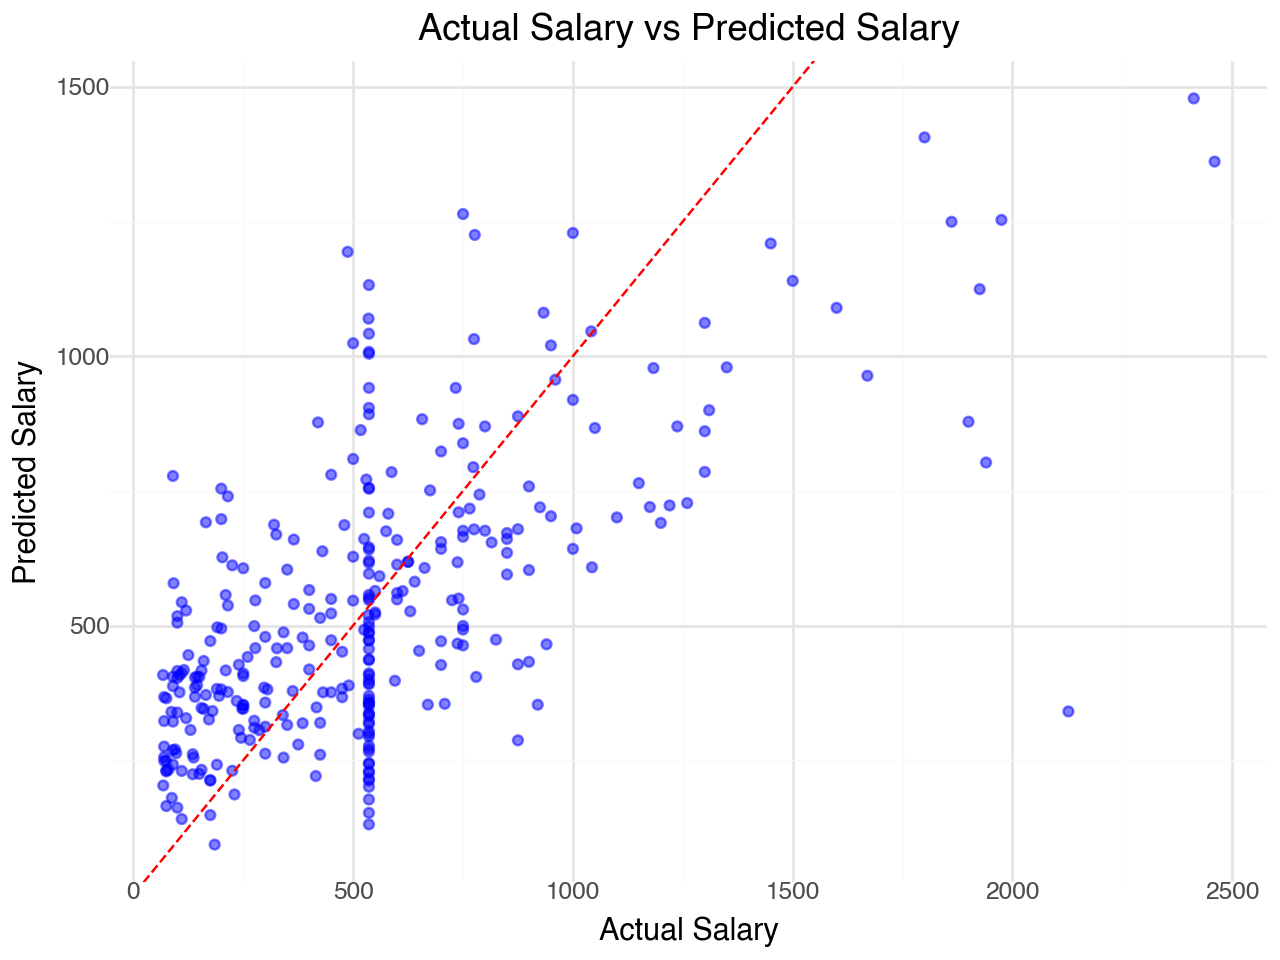

In [65]:
y_pred = finalModel.predict(X)

# Create a DataFrame for residuals and predictions
results = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y
})


plot = (
    ggplot(results, aes(x='Actual', y='Predicted'))
    + geom_point(color='blue', alpha=0.5)
    + geom_abline(intercept=0, slope=1, color="red", linetype="dashed")
    + labs(title="Actual Salary vs Predicted Salary", x="Actual Salary", y="Predicted Salary")
    + theme_minimal()
)
plot


In [66]:
modelName = finalModel.named_steps['Model']
coef = modelName.coef_

featureNames = finalModel.named_steps['preprocessing'].get_feature_names_out()
cleanedFeatures = [name.replace('Standardize__','') for name in featureNames]
cleanedFeatures = [name.replace('Encoding__','') for name in cleanedFeatures]

coefDict = dict(zip(cleanedFeatures, coef))
sortedCoef = sorted(coefDict.items(), key=lambda x: abs(x[1]), reverse=True)
print("Important feature in Decending order are:")
for feature, coef in sortedCoef[:5]:
    print(f"{feature}: {coef}")

Important feature in Decending order are:
AtBat: -244.65445573479835
CRuns: 211.43322304371316
Hits: 203.4570569834144
CWalks: -126.45673823379403
CHits: 120.90978783333797


Meam Squarred Error came out to be 105645.945. <br>
Top five feature were **AtBat, CRuns, Hits, CWalks, CHits**.<br>
For Example:<br>
1 unit increase in CRun increases the salary by 211 thousand of dollar.

**ChatGPT was used for Debugging the code.**